In [2]:
import nltk
import numpy as np
import pandas as pd
import pickle
import string
from sklearn.preprocessing import OneHotEncoder


In [3]:
%matplotlib inline

In [4]:
pubmed = pickle.load( open( "./Pubmed/bins/pubmed_1998.p", "rb" )  )

In [5]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
pubmed.head(2)

,pubmedid,year,title,jounal,lang
600465,11655160,1998,Controversies in transfusion medicine: directe...,Transfusion,eng
600787,11648630,1998,W v. Egdell.,The all England law reports,eng


In [7]:
pubmed.shape

(436415, 5)

In [8]:
pubmed['LEN'] = pubmed['title'].str.len()

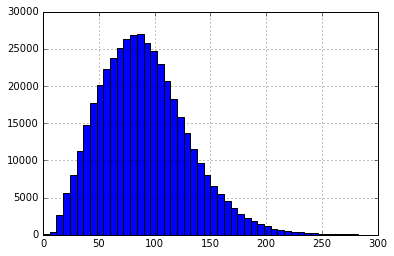

In [9]:
pubmed['LEN'].hist(bins=50,range=(0,300))

In [10]:
pubmed[pubmed['LEN']<20]

,pubmedid,year,title,jounal,lang,LEN
600787,11648630,1998,W v. Egdell.,The all England law reports,eng,12
650662,11540794,1998,Space medicine.,American scientist,eng,15
721635,11660380,1998,Editorial.,Bulletin of medical ethics,eng,10
721637,11655067,1998,"Disabled, not dead.",The Responsive community : rights and responsi...,eng,19
721673,11655225,1998,War medicine.,Dolentium Hominum,eng,13
722014,11655229,1998,Judaism.,Dolentium Hominum,eng,8
722137,11656670,1998,What right to die?,"New republic (New York, N.Y.)",eng,18
722168,11648305,1998,In re Fiori.,Atlantic reporter,eng,12
722170,12041121,1998,Hecht v. Kaplan.,New York supplement. Second series,eng,16
723460,12178873,1998,The angry pope.,"Conscience (Washington, D.C.)",eng,15


In [11]:
import re

In [12]:
wordPoll = list()
gotMatch=False
#red_flags = [ str(x) for x in range(0,10)]
red_flags = [r'\\', r'--', r'/', r'\d\d*']
df = pubmed[pubmed['lang']=='eng']
for idx, row in df.iterrows():
    raw = nltk.word_tokenize(row['title'].lower())
    if raw != '[Not Available].':
        for w in raw:
            if w not in string.punctuation:
                for regex in red_flags:
                    s = re.search(regex,w)
                    if s:
                         gotMatch = True
                         break
                        
                if not gotMatch:
                    wordPoll.append(w)
                gotMatch = False

In [ ]:
# after that remove, 1 or 2 counts
# I need to reduce the size of the vector

In [13]:
from collections import Counter

In [14]:
unify_poll = Counter(wordPoll)

In [15]:
unify_poll

Counter({u'vexillifera': 1,
         u'woodi': 1,
         u'podopediatric': 1,
         u'woods': 3,
         u'clotted': 8,
         u'spiders': 4,
         u'hexacetonide': 1,
         u'woody': 4,
         u'trawling': 1,
         u'gavac': 2,
         u'transferase-positive': 2,
         u'trichothecium': 1,
         u'sprague': 7,
         u'post-sandinista': 1,
         u'osteoblastic': 86,
         u'heliothis': 10,
         u'merogonic': 1,
         u'hemifusion': 3,
         u'naturopathic': 1,
         u'superantigenic': 3,
         u'trojan': 7,
         u'pigment': 175,
         u'cu-contaminated': 1,
         u'thrombus-capturing': 1,
         u'transvestism': 2,
         u'hydrolyzate': 2,
         u'bringing': 50,
         u'lithiasis': 4,
         u'leukosis-type': 1,
         u'uvulo-palato-pharyngoplasty': 1,
         u'co-express': 2,
         u'wooden': 9,
         u'wholemeal': 1,
         u'multiorgan': 17,
         u'wednesday': 1,
         u'd-cppene': 2,
     

In [16]:
##170716
# 4646542

In [17]:
len(wordPoll)

4521830

In [18]:
len(unify_poll)

136230

In [19]:
reduced = [x for x,y in unify_poll.items() if y >1]

In [21]:
len(reduced)

65658

In [22]:
# word to id dict
word_to_id = {token: idx for idx, token in enumerate(reduced)}
id_to_word = {idx: token for idx, token in enumerate(reduced)}


# convert token lists to token-id lists, e.g. [[1, 2], [2, 2]] here
#token_ids = [[word_to_id[token] for token in tokens_doc] for tokens_doc in tokens_docs]

In [23]:
len(word_to_id)

65658

In [24]:
end = len(word_to_id)

In [25]:
id_to_word[end] = ''

In [26]:
word_to_id[''] = end

In [27]:
#maxlen = 149
# full to zeros, pick a max lenght
# reshape X to be [samples, time steps, features]
# titles or phrases , length of the phrase, Vector features [0,..1..0]
# X = numpy.reshape(dataX, (len(dataX), seq_length, 1))

In [28]:
df = pubmed[pubmed['lang']=='eng']
#twiter_len = df[df['LEN']>15]
#twiter_len.shape

In [29]:
def validate(sentence, target, dic):
    r = True
    for s in sentence:
        if s in dic:
            pass
        else:
            r= False
    if target in dic:
        pass
    else:
        r= False
    return r

In [32]:
# float window 5 to 1
max_len = 5
overlap = 2
float_windows = list()
for idx, row in df.iterrows():
    window = list()
    raw = nltk.word_tokenize(row['title'].lower())
    if raw != '[Not Available].':
        for w in raw:
            if w not in string.punctuation:
                window.append(w)
    if len(window) > 14:
        for i in range(0, len(window)- max_len, overlap):
            # previous, plus prediction
            if len(float_windows)< 90000:
                sentence = window[i: i + max_len]
                target =  window[i + max_len]
                if validate(sentence, target, reduced):
                    float_windows.append([sentence,
                                          target])
            else:
                break

In [33]:
len(float_windows)

90000

In [34]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Activation
from keras.layers import LSTM
from keras.datasets import imdb
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [35]:
# import tensorflow as tf
# sess = tf.Session()

# from keras import backend as K
# K.set_session(sess)

In [49]:
import tensorflow as tf

In [50]:
tf.__version__

'1.3.0'

In [36]:
def return_ids(raw_title):
    title_ids = list()
    #tokenized_title = nltk.word_tokenize(row['title'].lower())


    for w in raw_title:
        #if w not in string.punctuation:
            title_ids.append(word_to_id[w])
    return title_ids

In [37]:
X = np.zeros((len(float_windows), max_len, len(word_to_id)), dtype=np.bool)
y = np.zeros((len(float_windows), len(word_to_id)), dtype=np.bool)

for idx, title in enumerate(float_windows):
    title_ids = return_ids(title[0])

    # vectorize in LSTM format   
    for jdx,wi in enumerate(title_ids):
        X[idx, jdx, wi] = 1
    y[idx, word_to_id[title[1]]] = 1
        
        
    
    

In [38]:
# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(256, input_shape=(max_len, len(word_to_id))))
model.add(Dropout(0.2))
model.add(Dense(len(word_to_id)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


In [54]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [41]:
print('-' * 50)
fileName= '1998'
filepath = fileName+"-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
model.fit(X, y, batch_size=350, nb_epoch=25, callbacks=callbacks_list)

--------------------------------------------------
Epoch 1/25
90000/90000 [==============================] - 136s - loss: 3.4912   
Epoch 2/25
90000/90000 [==============================] - 139s - loss: 3.2982   
Epoch 3/25
90000/90000 [==============================] - 135s - loss: 3.2669   
Epoch 4/25
90000/90000 [==============================] - 136s - loss: 3.2338   
Epoch 5/25
90000/90000 [==============================] - 137s - loss: 3.2168   
Epoch 6/25
90000/90000 [==============================] - 136s - loss: 3.2124   
Epoch 7/25
90000/90000 [==============================] - 137s - loss: 3.1971   
Epoch 8/25
90000/90000 [==============================] - 137s - loss: 3.1798   
Epoch 9/25
90000/90000 [==============================] - 137s - loss: 3.1740   
Epoch 10/25
90000/90000 [==============================] - 139s - loss: 3.1639   
Epoch 11/25
90000/90000 [==============================] - 136s - loss: 3.1408   
Epoch 12/25
90000/90000 [==============================]

In [57]:
y.shape

(90000, 170717)

In [42]:
import random


In [44]:
 random.randint(0, len(word_to_id) )

14987

In [ ]:
for i in  random.randint(0, len(word_to_id) )

In [51]:
word_to_id['genetics']

37609

In [59]:
# my seed
seed = ['a','novel', 'study', 'on', 'human' ]

In [60]:

title_ids = return_ids(seed)



In [61]:
title_ids

[35340, 44721, 42855, 15283, 20841]

In [62]:
x = np.zeros((1, max_len, len(word_to_id)))
for t, word in enumerate(title_ids):
    x[0, t, word] =1 

In [66]:
pred = model.predict(x)[0]

In [68]:
pred.shape

(65659,)

In [69]:
temperature = 1
preds = np.asarray(pred).astype('float64')
preds = np.log(preds) / temperature
exp_preds = np.exp(preds)
preds = exp_preds / np.sum(exp_preds)
probas = np.random.multinomial(1, preds, 1)
np.argmax(probas)

38887

In [70]:
id_to_word[38887]

u'large'

In [71]:
seed2 = ['novel', 'study', 'on', 'human','large' ]
title_ids = return_ids(seed2)

x = np.zeros((1, max_len, len(word_to_id)))
for t, word in enumerate(title_ids):
    x[0, t, word] =1 
pred = model.predict(x)[0]
temperature = 1
preds = np.asarray(pred).astype('float64')
preds = np.log(preds) / temperature
exp_preds = np.exp(preds)
preds = exp_preds / np.sum(exp_preds)
probas = np.random.multinomial(1, preds, 1)
id_to_word[np.argmax(probas)]

u'heart'

In [ ]:
start_index = random.randint(0, len(raw_text) - max_len - 1)
#len(word_to_id)
import gc
for diversity in [0.2, 0.5, 1.0, 1.2]:
    print()
    print('----- diversity:', diversity)

    generated = ''
    sentence = raw_text[start_index: start_index + maxlen]
    generated += ' '.join([value for value in sentence])
    print('----- Generating with seed: "' + ' '.join([value for value in sentence]) + '"')
    sys.stdout.write(generated)

    for i in range(400):
        x = np.zeros((1, max_len, len(word_to_id)))
        for t, word in enumerate(sentence):
            x[0, t, char_indices[word]] = 1.

        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]

        generated += next_char + " "
        sentence = sentence[1:]
        sentence.append(next_char)

        sys.stdout.write(" " + next_char)
        sys.stdout.flush()
    print()
gc.collect()